<a href="https://colab.research.google.com/github/qfaizan401/AI-Expert-Roadmap/blob/main/CNN/cnn_with_Funcatioanl_API_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/mel_spectrogram_10x/train'
val_dir = '/content/drive/MyDrive/mel_spectrogram_10x/val'

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                class_mode='categorical')

Found 7000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 256, 256, 3)
labels batch shape: (32, 10)


In [4]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [5]:
def cnn_model (data_batch):
  input = tf.keras.Input(shape=(data_batch.shape[1], 
                                data_batch.shape[2], 
                                data_batch.shape[3]))
  
  cnn_1 = tf.keras.layers.Conv2D(filters = 64, 
                             kernel_size = (3, 3), 
                             activation='relu',
                             input_shape=(256, 256, 3))(input)
  mp_1 = tf.keras.layers.MaxPool2D((2,2))(cnn_1)

  cnn_2 = tf.keras.layers.Conv2D(filters = 64, 
                             kernel_size = (3,3),
                             activation = 'relu')(mp_1)
  mp_2 = tf.keras.layers.MaxPool2D((2,2))(cnn_2)

  cnn_3 = tf.keras.layers.Conv2D(filters = 64, 
                             kernel_size = (3,3),
                             activation = 'relu')(mp_2)
  mp_3 = tf.keras.layers.MaxPool2D((2,2))(cnn_3)

  cnn_4 = tf.keras.layers.Conv2D(filters = 64, 
                             kernel_size = (3,3),
                             activation = 'relu')(mp_3)
  mp_4 = tf.keras.layers.MaxPool2D((2,2))(cnn_4)

  cnn_5 = tf.keras.layers.Conv2D(filters = 64, 
                             kernel_size = (3,3),
                             activation = 'relu')(mp_4)
  mp_5 = tf.keras.layers.MaxPool2D((2,2))(cnn_5)

  cnn_6 = tf.keras.layers.Conv2D(filters = 64, 
                             kernel_size = (3,3),
                             activation = 'relu')(mp_5)
  mp_6 = tf.keras.layers.MaxPool2D((2,2))(cnn_6)

  flat = tf.keras.layers.Flatten()((mp_6))

  drop = tf.keras.layers.Dropout(rate = 0.5)(flat)

  dense_1 = tf.keras.layers.Dense(units = 64, activation='relu')(drop)

  output = tf.keras.layers.Dense(units = 10, activation='softmax')(dense_1)

  model = tf.keras.Model(inputs=input, outputs=output, name="music_classifier")
  print(model.summary())

  return model

In [6]:
model = cnn_model(data_batch)

Model: "music_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)   

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc', 
                                             patience=3, 
                                             verbose=1, 
                                             mode='max', 
                                             restore_best_weights=True)

In [10]:
history = model.fit(train_generator,
                    epochs=500,
                    batch_size=20,
                    validation_data=val_generator,
                    callbacks=[callback])

Epoch 1/500
219/219 [==============================] - 4448s 20s/step - loss: 2.2169 - acc: 0.1824 - val_loss: 2.0898 - val_acc: 0.2700
Epoch 2/500
219/219 [==============================] - 27s 123ms/step - loss: 2.1014 - acc: 0.2291 - val_loss: 2.0684 - val_acc: 0.2570
Epoch 3/500
219/219 [==============================] - 27s 124ms/step - loss: 2.0281 - acc: 0.2690 - val_loss: 2.0147 - val_acc: 0.3020
Epoch 4/500
219/219 [==============================] - 28s 126ms/step - loss: 1.9303 - acc: 0.3136 - val_loss: 1.8589 - val_acc: 0.3335
Epoch 5/500
219/219 [==============================] - 27s 123ms/step - loss: 1.8136 - acc: 0.3541 - val_loss: 1.7759 - val_acc: 0.3260
Epoch 6/500
219/219 [==============================] - 27s 123ms/step - loss: 1.7408 - acc: 0.3716 - val_loss: 1.7559 - val_acc: 0.3140
Epoch 7/500
219/219 [==============================] - 27s 123ms/step - loss: 1.6790 - acc: 0.3910 - val_loss: 1.7954 - val_acc: 0.3135
Epoch 8/500
219/219 [===========================

In [11]:
path = '/content/drive/MyDrive/Colab Notebooks/cnn_with_Functional_API_softmax.h5'
model.save(path)

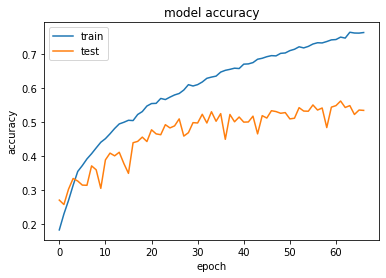

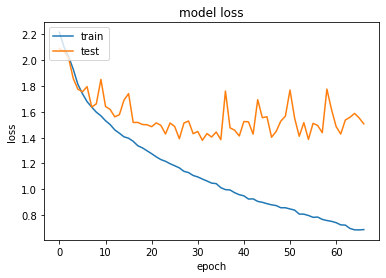

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
from keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/MyDrive/mel_spectrogram_10x/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    class_mode='categorical')

Found 990 images belonging to 10 classes.


In [6]:
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 256, 256, 3)
labels batch shape: (32, 10)


In [3]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/cnn_with_Functional_API_softmax.h5')

In [7]:
scores = model.evaluate(test_generator, verbose=0)
print(f'Test Accuracy: {round(scores[1]*100)}%')

Test Accuracy: 57%
